### Linear Autograd Model

Lets create a simple linear model in pytorch from scratch.  First we need some fitting data:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis] 
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)


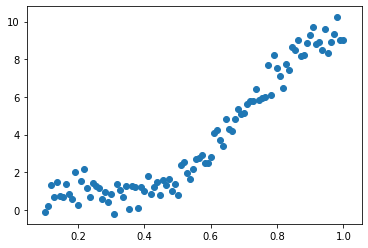

In [32]:
plt.scatter(data_x, data_y)

### The model

Lets begin by creating the model

In [34]:
import torch
torch.set_default_dtype(torch.float64)

In [35]:
X_train = torch.from_numpy(data_x)
Y_train = torch.from_numpy(data_y)

In [99]:
# Some configs for our network
INPUT_SIZE = 1
HIDDEN_SIZE = 1
OUTPUT_SIZE = 1

In [100]:
# Initialize our weights
w1 = torch.rand(INPUT_SIZE, HIDDEN_SIZE, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [101]:
# Initialize our weights
w2 = torch.rand(HIDDEN_SIZE, OUTPUT_SIZE, requires_grad=True)
w2.dtype

torch.float64

In [102]:
LEARNING_RATE = 1e-6

In [93]:
for i in range (1,30000):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum() # mean square error
    
    if i % 50 == 0:
        print(f'{i=} : {loss.item()}')
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= LEARNING_RATE * w1.grad
        w2 -= LEARNING_RATE * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

i=50 : 1750.442509796603
i=100 : 1712.3000227477512
i=150 : 1673.6693580763579
i=200 : 1634.5794319539746
i=250 : 1595.0654645727027
i=300 : 1555.1688512582425
i=350 : 1514.9369744882622
i=400 : 1474.4229525211022
i=450 : 1433.6853214970847
i=500 : 1392.7876492184655
i=550 : 1351.7980803252603
i=600 : 1310.788814233521
i=650 : 1269.8355189510135
i=700 : 1229.0166856843816
i=750 : 1188.4129309454609
i=800 : 1148.1062545903444
i=850 : 1108.179263817508
i=900 : 1068.7143745448998
i=950 : 1029.7930027176344
i=1000 : 991.4947589114947
i=1050 : 953.8966600468267
i=1100 : 917.072372079523
i=1150 : 881.0914971734428
i=1200 : 846.0189180819816
i=1250 : 811.9142112939373
i=1300 : 778.8311389665413
i=1350 : 746.8172278291743
i=1400 : 715.9134411614477
i=1450 : 686.1539477061493
i=1500 : 657.5659890547747
i=1550 : 630.1698447269068
i=1600 : 603.9788919381585
i=1650 : 578.9997549919055
i=1700 : 555.2325374044658
i=1750 : 532.6711283355592
i=1800 : 511.3035736843401
i=1850 : 491.1125013485139
i=1900

i=15650 : 239.34626539111255
i=15700 : 239.34626539111187
i=15750 : 239.3462653911112
i=15800 : 239.34626539111062
i=15850 : 239.34626539111014
i=15900 : 239.34626539110963
i=15950 : 239.34626539110923
i=16000 : 239.3462653911088
i=16050 : 239.34626539110852
i=16100 : 239.34626539110823
i=16150 : 239.34626539110795
i=16200 : 239.34626539110772
i=16250 : 239.3462653911076
i=16300 : 239.34626539110735
i=16350 : 239.3462653911072
i=16400 : 239.34626539110704
i=16450 : 239.34626539110693
i=16500 : 239.34626539110678
i=16550 : 239.34626539110673
i=16600 : 239.34626539110658
i=16650 : 239.34626539110656
i=16700 : 239.34626539110647
i=16750 : 239.3462653911064
i=16800 : 239.34626539110636
i=16850 : 239.34626539110627
i=16900 : 239.34626539110621
i=16950 : 239.3462653911062
i=17000 : 239.34626539110613
i=17050 : 239.34626539110616
i=17100 : 239.34626539110616
i=17150 : 239.34626539110613
i=17200 : 239.346265391106
i=17250 : 239.34626539110607
i=17300 : 239.346265391106
i=17350 : 239.3462653911

In [94]:
w1

tensor([[1.8382, 0.9210, 0.9427, 0.5565, 1.6627]], requires_grad=True)

In [95]:
w2

tensor([[1.8276],
        [0.8068],
        [1.1262],
        [0.4641],
        [1.4018]], requires_grad=True)

In [96]:
predicted_in_tensor = X_train.mm(w1).mm(w2)
predicted_in_tensor[:5]

tensor([[0.7753],
        [0.8458],
        [0.9163],
        [0.9868],
        [1.0573]], grad_fn=<SliceBackward>)

In [97]:
predicted = predicted_in_tensor.detach().numpy()
predicted[:5]

array([[0.77532234],
       [0.84580619],
       [0.91629004],
       [0.98677389],
       [1.05725774]])

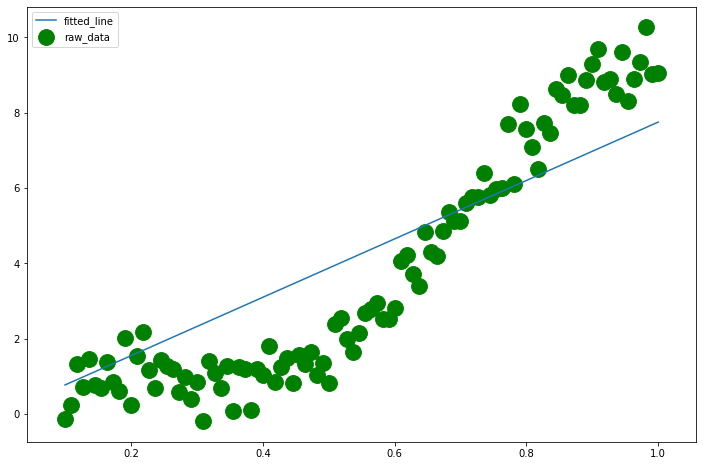

In [98]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, Y_train, label='raw_data', s=250, c='g')
plt.plot(X_train, predicted, label='fitted_line')
plt.legend()
plt.show()

### Awesome

So we have now done a linear regression using pytorch and autograd!  So far we have done:
- Gradient descent to train a neural net
- Forward and backward passing
- Looked at different methods for gradient descent
- Looked at automatic diff using autograd

Next module we'll look at dynamic computation graphs!